In [64]:
import matplotlib.pyplot as plt
%pylab inline

import numpy as np

Populating the interactive namespace from numpy and matplotlib


# Random Numbers

Documentation: https://docs.scipy.org/doc/numpy/reference/routines.random.html


Numpy gives us the ability to select random numbers from a variety of different distribution functions (see the np.random documentation for a full list). However, the two most frequently used distributions are 

- the uniform distribution: np.random.rand
- the normal (Gaussian) distribution: np.random.randn

The uniform distribution (rand) gives numbers uniformly distributed over the interval [0,1) and takes the size of the desired output array as an argument.


First, let's generate a vector of length 5 populated with 5 uniformly distributed random numbers

In [65]:
np.random.rand(5)

array([ 0.90489044,  0.83888079,  0.30071124,  0.26371148,  0.90865846])

We can also generate arrays by specifying the size in each dimension.

In [66]:
np.random.rand(5,5)

array([[ 0.20732746,  0.94838441,  0.45968884,  0.49973423,  0.41145001],
       [ 0.46087179,  0.15868829,  0.96049104,  0.43674893,  0.27057036],
       [ 0.18191328,  0.68830836,  0.70984045,  0.39928541,  0.42481437],
       [ 0.7366026 ,  0.31622485,  0.68543823,  0.04194633,  0.13056346],
       [ 0.3044429 ,  0.25132042,  0.55544087,  0.08409037,  0.17045707]])

So, it turns out that np.random does not give us truly random numbers, but what are called "pseudo-random" numbers. The random numbers that we get are based on a 'seed' number. By default, this seed is chosen based off of a different random generator. However, we have the option to specify the seed.

In practice, you will normally not specify the seed so that you get a new set of random numbers. However, it can be useful for debugging or analysis purposes to pick a seed so that you get the exact same set each time the program is run. Try re-running the cell above a few times and notice how the numbers are different each time. Next, run the cell below multiple times, and notice how the result is always the same

In [67]:
np.random.seed(1337)
np.random.rand(5,5)

array([[ 0.26202468,  0.15868397,  0.27812652,  0.45931689,  0.32100054],
       [ 0.51839282,  0.26194293,  0.97608528,  0.73281455,  0.11527423],
       [ 0.38627507,  0.62850118,  0.12505793,  0.98354861,  0.44322487],
       [ 0.78955834,  0.79411858,  0.36126157,  0.41610394,  0.58425813],
       [ 0.76017177,  0.18780841,  0.28816715,  0.67021886,  0.49964826]])

The normal distribution selects random numbers from a Gaussian curve (sometimes called a bell curve), which is given by

$f(x) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{\frac{-(x-\mu)^2}{2\sigma^2}}$

where $\mu$ is the mean and $\sigma$ is the standard deviation. 

(FYI: don't panic if this part is confusing right now, we're going to explore the Gaussian more in just a bit)

np.random.randn selects numbers from this standard normal distribution, which is the gaussian for $\mu=0$ and $\sigma=1$. It takes a shape argument just like rand does


In [68]:
np.random.randn(5)

array([-0.33267992, -1.23112306,  0.14860042, -1.41011215, -0.40859609])

# Histograms
Documentation: http://matplotlib.org/1.2.1/api/pyplot_api.html?highlight=hist#matplotlib.pyplot.hist

Understanding these normal distributions is perhaps best done by plotting them in a histogram. Fortunately, matplotlib makes that very simple for us

plt.hist takes,at minimum, a vector of values that we want to generate a histogram of. We can also specify the number of bins

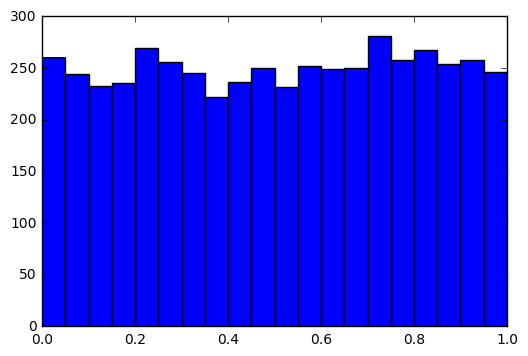

In [69]:
X = np.random.rand(5000)
N,bins,patches = plt.hist(X, bins=20)

You can go ahead and vary the length of the random array or the number of bins and see how random noise effects the output.

Now, let's take a look at the gaussian distribution using a histogram. Generate a vector of length 5000 from the normal distribution and plot a histogram with 50 bins

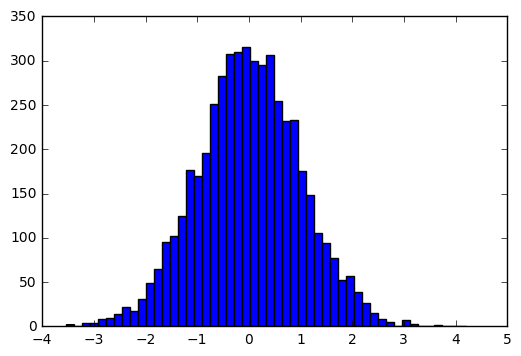

In [70]:
#Put your code here
X = np.random.randn(5000)
N,bins,patches = plt.hist(X,bins=50)

A gaussian with mean zero and standard deviation one is not particularly interesting. However we can transform the distribution given by np.random.randn() using simple arithmetic:

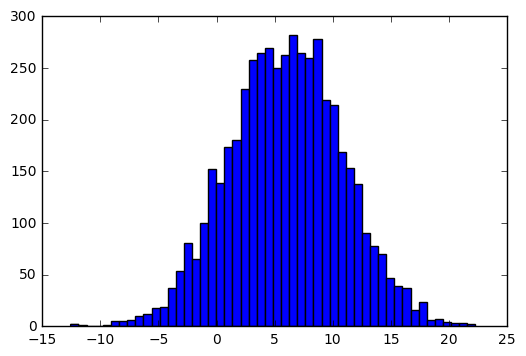

In [71]:
mu = 6 #the mean of the distribution
sigma = 5 #the standard deviation

X = sigma * np.random.randn(5000) + mu
N,bins,patches = plt.hist(X,bins=50)

Vary the values of mu and sigma in the above code to see how the mean affects the center of the distribution and the standard deviation affects the width.

Numpy also gives us the ability to calculate the mean and standard deviation of a distribution

In [72]:
mean = np.mean(X)
std = np.std(X)
print('mean: '+ repr(mean) )
print('standard deviation: ' + repr(std))

mean: 5.9492125898814354
standard deviation: 4.8583857454470794


Ok, so generating random numbers and then getting statistics about them is not particularly helpful, so let's try working with some real data. First, we'll import a list of fluorescence lifetimes in nanoseconds from Nitrogen-Vacancy defects in diamond 

(While it is not at all necessary to understand the physics behind this, this is real data! You can read more about it at http://www.nature.com/articles/ncomms11820 if you are so inclined. This data is from Fig. 6a)

In [73]:
lifetimes = np.loadtxt('Data/LifetimeData.txt')

Next, plot a histogram of this data set (play around with the number of bins, too)

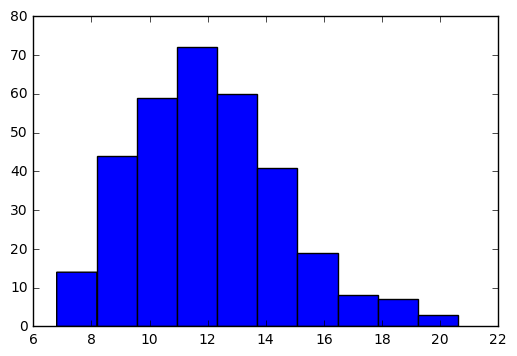

In [74]:
#Put your code here
N,bins,patches = plt.hist(lifetimes,bins=10)

Now, calculate and print the mean and standard deviation of this distribution

In [75]:
#Put your code here
mean = np.mean(lifetimes)
std = np.std(lifetimes)
print("mean: "+repr(mean))
print("standard deviation: "+repr(std))

mean: 12.026044036697249
standard deviation: 2.5675576211167996


## Bonus Material?
Let's try and overlay a Gaussian curve on top of the histogram we just plotted. To do that, we are first going to need to define a function for the Gaussian. Name your function `gaussian` and have it take the arguments `X, sigma, mu`

remember, a Gaussian is defined by $f(x) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{\frac{-(x-\mu)^2}{2\sigma^2}}$

In [76]:
#put your code here
def gaussian(X,sigma,mu):
    return 1/np.sqrt(2*np.pi*sigma**2)*np.exp(-(X-mu)**2/(2*sigma**2))

Now lets check to see if your function is correct by plotting it

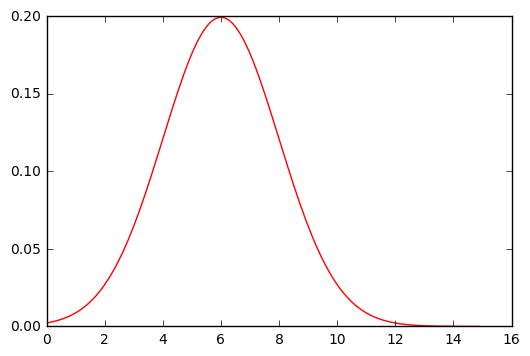

In [77]:
X = np.arange(0,15,0.1)
sigma = 2
mu = 6
plt.plot(X,gaussian(X,sigma,mu),'r-')

If your gaussian is correct, your plot should look like this: 

![gaussian](Data/gaussian.png)

Now, re-plot the histogram of lifetimes from above, but also overlay a plot of the gaussian curve with the same mean and standard deviation from the lifetime distribution. It's important to notice that the gaussian curve is normalized to have a sum under the curve equal to one, but the histogram does not! Fortunately, we can fix this by adding `normed=True` to the list of arguments passed to `plt.hist`

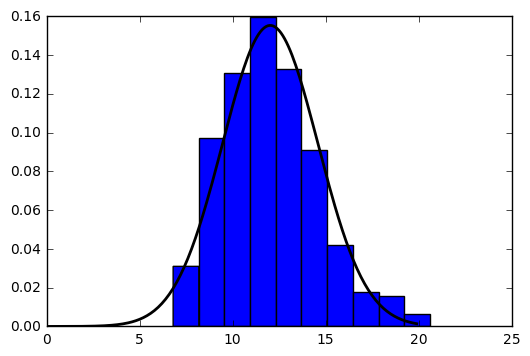

In [78]:
#Put your Code Here

X = np.arange(0,20,0.1)
mu = np.mean(lifetimes)
sigma = np.std(lifetimes)
plt.hist(lifetimes,bins=10,normed=True)
plt.plot(X,gaussian(X,sigma,mu),'k-',linewidth=2)

# Linear Regression

Documentation: https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.linregress.html

When analyzing experimental data, we frequently would like to be able to fit theoretical models to match our results. You might have already used linear regression in a previous science course (In Excel, this is done with the LINEST function) The simplest case of that is fitting a straight line to a collection of data. This is done through a method known as linear regression. Since we don't have time to teach an entire statistics course, we will say that linear regression minimizes the total distance between each data point and best-fit line. 

First, lets load a set of data and plot it to see how it looks

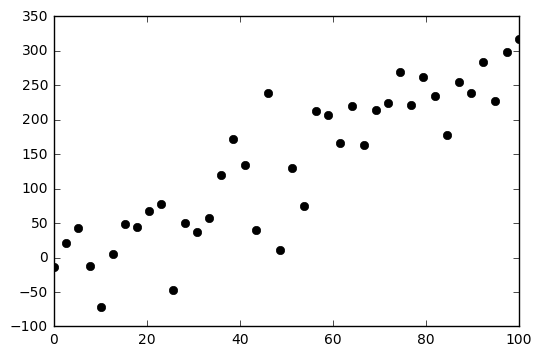

In [79]:
data = np.loadtxt('Data/scatter1.txt')
plt.plot(data[:,0],data[:,1],'ko')

Looking at the data gives us a pretty good idea that there is a linear relationship between the two variables. Now, we're gonna use `linregress` from the `scipy.stats` module to do a linear fit

In [80]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(data[:,0],data[:,1])
print("slope: "+repr(slope))
print("intercept: "+repr(intercept))
print("R squared: "+repr(r_value**2))

slope: 3.1856352778511705
intercept: -23.768063001977595
R squared: 0.79267176607187184


`stats.linregress` gives us quite a few pieces of output! First, it gives us the slope, $m$, and the intercept, $b$, for the best fit line (remember $y = mx +b$) It also gives us the $R^2$ value, which gives a general sense of the strength of the linear relationship between the x and y variables. $R^2$ varies between the values 0 and 1, with 1 indicating complete linearity and 0 indicating no linearity. Often, we will us $R^2$ to determine if a fit is "good", but we should always be careful when using statistics...

Now, lets go ahead and replot the scatter1.txt data from above, but then overlay the line of best fit using the slope and intercept from above

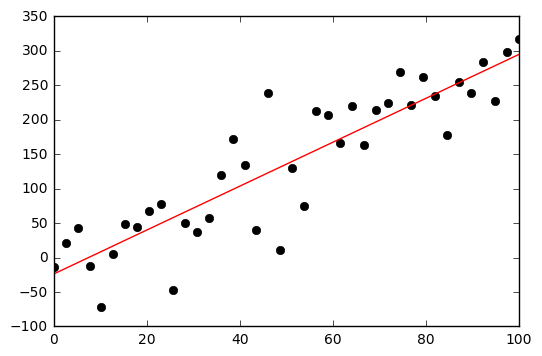

In [81]:
#Your Code Here
plt.plot(data[:,0],data[:,1],'ko')
X = np.arange(0,101,1)
plt.plot(X,slope*X+intercept,'r-')

When you're done, you should have a plot like this:
![scatter plot](Data/scatter1-fit.png)

# Non-linear Fitting: Experiment to Models
Now we will try a Non-linear fit to some real data! Typically, most things measuered in labs will be non-linear in nature, and will require built-in computer algorithms if we hope to fit our models to data. 

In this example, we will be taking data from a real lab and fitting it to a model in order to learn more about the physical system being examine! Here, we have data from a classical muclear physics experiment in gamma spectropscy. Sometimes, atoms can be created in unstable, excited configurations, which will cause them to relax to a more stable state. Physically, this is achieved through the shed of mass and energy (light and particles), also known as ionizing radiation. One such type are Gamma-rays, light with wavelengths on the order of picometers and below, or 100 keV energy and above.

In our lab, $^{133}Ba$ had it's gamma spectrum observed with intensity as a function of photon (or light) energy. Theory predicts that $^{133}Ba$ decays into $^{133}Cs$ through many different channels, all close in energy. Let's take our data from the lab and plot it to see what our spectrum looks like.

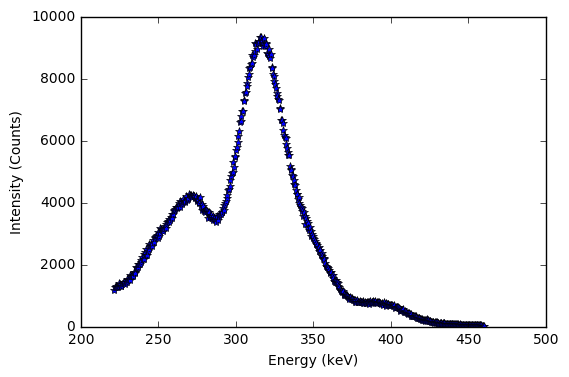

In [82]:
#Open up data file, 'Ba133Peaks'. You will need columns 1 and 2
#which contain energy and intensity respectively. Go ahead 
#and plot intensity vs energy. Don't forget some labels!
#And try to plot it as points, not lines 

#Energy in units keV or (kilo-electron volts)
#Intensity is measured in counts recorded at the detector (just use counts as your units)

data=np.loadtxt('Ba133Peaks.txt')
Energy=data[:,0] #1nd column 
Intensity=data[:,1] #2rd column

figure()
plot(Energy,Intensity,'*')
xlabel('Energy (keV)')
ylabel('Intensity (Counts)')

The data doesn't look like any fundamental function we know of right off the bat. This will require us to accurately model our data if we hope to get any useful information out of this. As stated, $^{133}Ba$ has many decay modes within this range in energy, so it's no wonder the data looks like a mess! We can clearly see some sort of intensity peak of one of the stronger modes at around 320 keV and some smaller modes at around 270 keV and 400 keV. There also appears to be a sloped background (caused by scattering within the detector). Due tothe decay modes' tightly spaced natures, the peaks have overlapped, making it hard to idenify exact positions, numbers of peaks, and relative intensities. There could even be smaller modes hiding within that we cannot imediately see the effects of by eye!

Our final goal for this class will be to create a model to fit to this data, that when fit, will clue us in to possible decay modes present in our data.

Let's start with creating a *new* Guassian (or Normal) function, common to many spectra for describing their intensity as a function of energy. Here is the formula we will use for an unnormilized Guassian:

$G(x;A,\sigma,x_0)=Ae^{-\frac{(x-x_0)^2}{2\sigma^2}}$

Where x is the coordinate (in this case, energy)

A is the height of the curve, or unnormalized amplitude

$x_0$ is the center of the peak

$\sigma$ is the "standard diviation" of the peak (for now, take it as a measure of width)

In [83]:
#Create a defintion for the Guassian. Make sure the name does not overlap with guassian from earlier!
def Guassian(x,A,x0,sigma):
    G=A*np.exp(-(x-x0)**2/(2*sigma**2))
    return G

Now test to make sure we have the right function. Here is a sample np array of values for x between -20 and 20. Try plotting G with (x,5,2,3) and (x,1,2,1). Then plot their sums. Does this funky sort of shape look familiar? What do you think would happen if we added more of them? Feel free to play around with the number of guassians and their parameters. Watch how the individual peaks work to change the shape presented here.

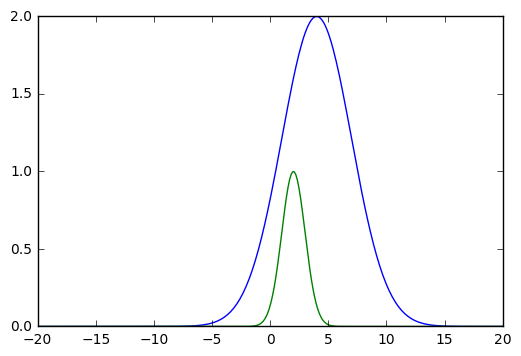

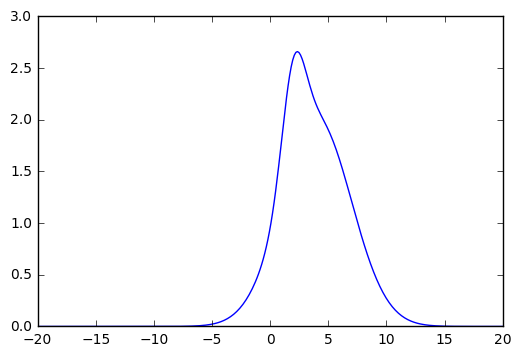

In [84]:
x=np.linspace(-20,20,300)
y1=Guassian(x,2,4,3)
y2=Guassian(x,1,2,1)

figure(1)
plot(x,y1)
plot(x,y2)

figure(2)
plot(x,y1+y2)

So it seems we can model our data efficently by using a sum of different Guassians, one for each decay mode, plus a sloped background from the detector. Create a new function for a sloped background (B(x;a,b)) and a final function to describe all the peaks, plus background, (let's call it Peaks(x;...)). The structure, in math, should be:

$B(x;a,b)=ax+b$ .... this is just your general equation for a line from algebra

$Peaks(x;A_1,x_1,\sigma_1,...,A_4,x_4,\sigma_4,a,b)=G_1(x;A_1,x_1,\sigma_1)+...+G_4(x;A_4,x_4,\sigma_4)+B(x;a,b)$ ......4 peaks plus a background

In [85]:
#Define your new functions here in terms of your guassian function. No need to rewrite the definition. You already have it!

def Background(x,a,b):
    B=a*x+b
    return B

def Peaks(x,A1,x1,sig1,A2,x2,sig2,A3,x3,sig3,A4,x4,sig4,a,b):
    P=Guassian(x,A1,x1,sig1)+Guassian(x,A2,x2,sig2)+Guassian(x,A3,x3,sig3)+Guassian(x,A4,x4,sig4)+B(x,a,b)
    return P

Now we will use the function, curve_fit from scipy.optimize (imported as so.curve_fit). Here is the webpage for the function: https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.optimize.curve_fit.html

Study these imputs and you'll notice the function requires you to guess inputs. This uses the a non-linear, least-squares method to fit the data. Without getting bogged down in details, this is a good $local fitter$ in that, if you are way off based with your guessing parameters, you will most likely not get the right answer. This type of fitter is easy to use, but can be finicky with the answers, due to it's local nature. There are other fitting algorithms which are good golbally (such as simulated annealing) so be on the look out for them in the future if fitting becomes combersome. 

# Steps for using curve_fit

Here is the basic outline on how to use curve_fit.

1.) Make sure you have your data ready, both depedent and independent (x and y). Make sure they are the same length!

2.) Now make an array of your guessed parameters. Call it Pguess=array([...]). Each entry for each parameter (after x) in the Peaks definition IN ORDER. Try not to be too lazy with your guesses, they matter for finding the right answer.

3.) Use curve_fit and point the output to an array Pfit. These are the fitted parameters.

4.) re-enter the Pfit parameters into Peaks to create a new fit function (yfit). Define a new array (xfit) of thinly spaced values over your range to get a continuous looking array for yfit.

5.) plot your data, your fitted function, and (maybe) your guess function to see how you did. Make sure your seperate your colors so you know the difference between data, fit, and (maybe) guess. How did you do? If you aren't happy, try new parameters and re-run the cell!


In [86]:
import scipy.optimize as so #new functions needed for this section. Shift enter to grab the library.